#1.0 Import Libraries

In [179]:
import pandas as pd
!pip install yfinance 
import yfinance as yf
!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()
import numpy as np
import statistics
import math
import seaborn as sns

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.60)


#2.0 Import Portfolio

In [180]:
stocks=["AAPL","MSFT","TSLA","GOOG","PETR4.SA","VALE3.SA","ABEV3.SA"]# just example of stocks
weights=[0.4,0.1,0.1,0.1,0.1,0.1,0.1]#just example of weights, you can optimize these if you want
if len(weights)!= len(stocks):
  for a in range(len(stocks)):
    weights.append(1/len(stocks))
weights=np.array(weights)


In [181]:
start_date="2017-12-29"# you can set the data, but 3 years is very common
df=yf.download(stocks,start=start_date,progress=False)["Adj Close"]
df.tail(6)#Viewing The Last Data

,AAPL,ABEV3.SA,GOOG,MSFT,PETR4.SA,TSLA,VALE3.SA
Date,,,,,,,
2021-06-25,133.110001,16.950001,2539.899902,265.019989,29.100000,671.869995,112.400002
2021-06-28,134.779999,17.500000,2536.389893,268.720001,29.049999,688.719971,110.599998
2021-06-29,136.330002,17.290001,2520.370117,271.399994,29.180000,680.760010,112.510002
2021-06-30,136.960007,17.070000,2506.320068,270.899994,29.430000,679.700012,113.250000
2021-07-01,137.270004,17.200001,2527.370117,271.600006,29.059999,677.919983,111.279999
2021-07-02,139.960007,17.430000,2574.379883,277.649994,29.180000,678.900024,113.580002


#3.0 Daily Returns

In [182]:
# viewing the Daily Returns of each stock
df=df.pct_change()
df=df.dropna()
df

,AAPL,ABEV3.SA,GOOG,MSFT,PETR4.SA,TSLA,VALE3.SA
Date,,,,,,,
2018-01-02,0.017905,0.019267,0.017775,0.004793,0.027950,0.029485,0.036264
2018-01-03,-0.000174,0.002305,0.016413,0.004654,0.009064,-0.010233,-0.005992
2018-01-04,0.004645,-0.005520,0.003621,0.008801,0.001796,-0.008290,0.004099
2018-01-05,0.011385,0.003700,0.014571,0.012398,0.005977,0.006230,0.015610
2018-01-08,-0.003714,-0.001843,0.004273,0.001020,0.011884,0.062638,0.022228
...,...,...,...,...,...,...,...
2021-06-28,0.012546,0.032448,-0.001382,0.013961,-0.001718,0.025079,-0.016014
2021-06-29,0.011500,-0.012000,-0.006316,0.009973,0.004475,-0.011558,0.017269
2021-06-30,0.004621,-0.012724,-0.005575,-0.001842,0.008568,-0.001557,0.006577


#4.0 RMS with Log Returns

In [183]:
# not necessary cell, just curiosity
log_returns=(np.log(1+df))**2#LR Squared
log_returns=(log_returns.mean()*(252/1)**0.5)# Anualized
log_returns=log_returns.to_frame()
log_returns=log_returns.rename(columns={0: 'RMS'})
log_returns

,RMS
AAPL,0.007210
ABEV3.SA,0.006727
GOOG,0.005628
MSFT,0.005953
PETR4.SA,0.017444
TSLA,0.027685
VALE3.SA,0.011234


#5.0 Covariance Matrix

In [184]:
covariance=df.cov()*252#Anualized
covariance

,AAPL,ABEV3.SA,GOOG,MSFT,PETR4.SA,TSLA,VALE3.SA
AAPL,0.113809,0.028106,0.068339,0.079125,0.059640,0.095802,0.061629
ABEV3.SA,0.028106,0.105463,0.027957,0.029951,0.071422,0.033672,0.038837
GOOG,0.068339,0.027957,0.089052,0.072203,0.057291,0.074917,0.055219
MSFT,0.079125,0.029951,0.072203,0.093955,0.059663,0.090578,0.059173
PETR4.SA,0.059640,0.071422,0.057291,0.059663,0.261417,0.090623,0.105600
TSLA,0.095802,0.033672,0.074917,0.090578,0.090623,0.441410,0.066934
VALE3.SA,0.061629,0.038837,0.055219,0.059173,0.105600,0.066934,0.175092


#6.0 Correlation Heatmap

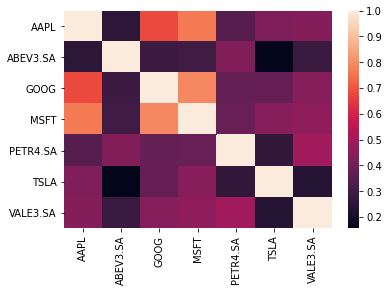

In [185]:
variance=df.var()*252#Anualized
variance=variance.to_frame()
variance=variance.rename(columns={0:"Variance"})
volatility=np.sqrt(variance)
volatility=volatility.rename(columns={"Variance": "Volatility"})
correlation=df.corr()
sns.heatmap(correlation)

# 7.0 Portfolio Volatility

In [186]:
portfolio_vol=np.sqrt(weights.T.dot(covariance).dot(weights))
portfolio_vol
expected_return=np.sum(df.mean()*weights)*252
expected_return

0.3965279486478154

# 8.0 Set the Risk Free Rate

In [187]:
r=0.045

# 9.0 More Risk Stocks

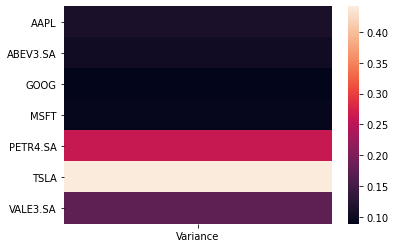

In [188]:
sns.heatmap(variance)

#10.0 Individual Stocks Returns

In [189]:
individual_returns_anualized=df.mean()*252
individual_returns_anualized=individual_returns_anualized.to_frame()
individual_returns_anualized.rename(columns={0:"Anual Returns %"})

,Anual Returns %
AAPL,0.403053
ABEV3.SA,0.022204
GOOG,0.296164
MSFT,0.389281
PETR4.SA,0.331867
TSLA,0.887617
VALE3.SA,0.425934


# 11.0 Calculating Sharpe Index

In [190]:
sharpe=(expected_return-r)/portfolio_vol
print(f"Sharpe Index: {sharpe.round(2)}")

Sharpe Index: 1.24
